# <font color = 'orange'> Preceptron

---

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import joblib

---

## Perceptron and it's Implementation

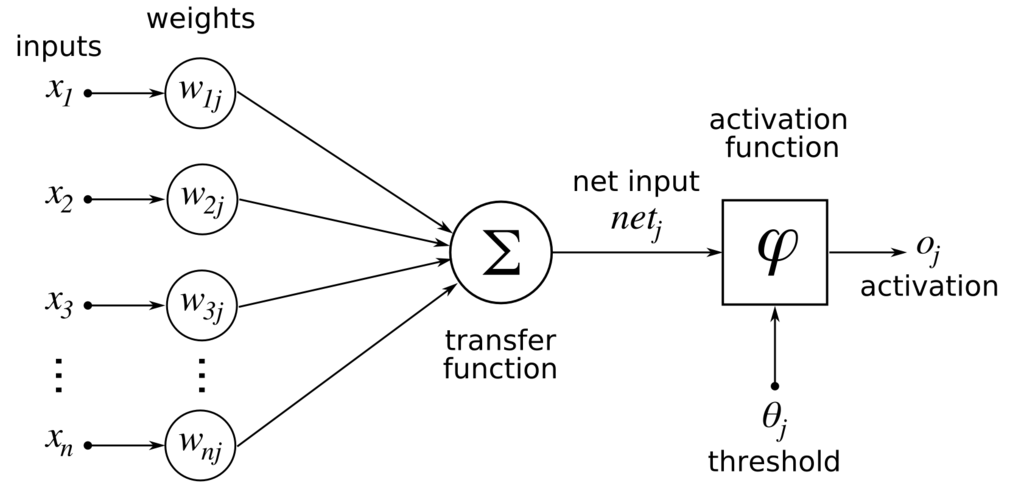

In [2]:
class Perceptron:
    
    
    def __init__(self, eta, epochs):
        # epochs is number of iterations 
        self.weights = np.random.randn(3) * 1e-4
        print(f'self.weights = {self.weights}')
        # eta is learning rate
        self.eta = eta
        self.epochs = epochs
        
    
    def activation_function(self, inputs, weights):
        # weighted average = x1.w1 + x2.w2 + ..... + xn.wn
        # here our threshold is 0
        z = np.dot(inputs, weights)
        return np.where(z > 0, 1, 0)
    
    # fit actually finds the actual specified weight
    def fit(self, x, y):
        self.x = x 
        self.y = y
        
        # adding bais at the end of the x 
        x_with_bias = np.c_[self.x, -np.ones((len(self.x), 1))]
        print(f'x_with_bais = \n{x_with_bias}')
        print('-'.center(70, '-'))
        
        for epoch in range(self.epochs):
            print(f'For epoch : {epoch}')
            
            y_hat = self.activation_function(x_with_bias, self.weights)
            print(f'Predicted values : {y_hat}')
            
            error = self.y - y_hat
            print(f'error : \n{error}')
            
            # update rule
            self.weights = self.weights + (self.eta * np.dot(x_with_bias.T, error))
            print(f'Updated weights : \n{self.weights}')
            print('-'.center(70, '-'))
            
    
    def predict(self, x):
        # addding 1 at the end of the x using concatination
        x_with_bias = np.c_[x, -np.ones( (len(self.x), 1 ))]
        return self.activation_function(x_with_bias, self.weights)

---

### <font color = 'blue'> AND Operation

In [3]:
data = {'x1': [0,0,1,1], 'x2' : [0,1,0,1], 'y' : [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [4]:
# independent variable

x = AND.drop('y', axis = 1)
x

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [5]:
# dependent variable

y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [6]:
model = Perceptron(eta = 0.5, epochs = 10)

model.fit(x, y)

self.weights = [-2.07642446e-04 -1.31705210e-04  6.66405079e-05]
x_with_bais = 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
----------------------------------------------------------------------
For epoch : 0
Predicted values : [0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights : 
[ 0.49979236  0.49986829 -0.49993336]
----------------------------------------------------------------------
For epoch : 1
Predicted values : [1 1 1 1]
error : 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights : 
[-2.07642446e-04 -1.31705210e-04  1.00006664e+00]
----------------------------------------------------------------------
For epoch : 2
Predicted values : [0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights : 
[0.49979236 0.49986829 0.50006664]
----------------------------------------------------------------------
For epoch : 3
Predicted values : [0 0 0 1]
error : 
0    0
1    0
2    0
3    0
Name: y, 

### <font color = '#AA00FF'> Observation :
* [0.50007069 0.50007231 1.00006811] = w1, w2 and bais
* We can notice that weights are tuning at each iteration.

In [7]:
model.predict(x)

array([0, 0, 0, 1])

### <font color = '#AA00FF'> Observation :
* Our Prediction is 100% correct.

In [8]:
model.weights

array([0.49979236, 0.49986829, 0.50006664])

---

### <font color = 'blue'> OR Operation

In [9]:
data = {'x1': [0,0,1,1], 'x2' : [0,1,0,1], 'y' : [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [10]:
# independent variable

x = OR.drop('y', axis = 1)
x

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [11]:
# dependent variable

y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [12]:
model = Perceptron(eta = 0.5, epochs = 10)
model.fit(x, y)

self.weights = [1.04424535e-05 1.41498260e-04 9.27283517e-05]
x_with_bais = 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
----------------------------------------------------------------------
For epoch : 0
Predicted values : [0 1 0 1]
error : 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
Updated weights : 
[ 5.00010442e-01  1.41498260e-04 -4.99907272e-01]
----------------------------------------------------------------------
For epoch : 1
Predicted values : [1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights : 
[5.00010442e-01 1.41498260e-04 9.27283517e-05]
----------------------------------------------------------------------
For epoch : 2
Predicted values : [0 1 1 1]
error : 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights : 
[5.00010442e-01 1.41498260e-04 9.27283517e-05]
----------------------------------------------------------------------
For epoch : 3
Predicted values : [0 1 1 1]
error : 
0    0
1    0
2    

In [13]:
model.predict(x)

array([0, 1, 1, 1])

In [14]:
model.weights

array([5.00010442e-01, 1.41498260e-04, 9.27283517e-05])

---

### <font color = 'blue'> XOR Operation

In [15]:
data = {'x1': [0,0,1,1], 'x2' : [0,1,0,1], 'y' : [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [16]:
# independent variable

x = XOR.drop('y', axis = 1)
x

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [17]:
# dependent variable

y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [18]:
model = Perceptron(eta = 0.5, epochs = 50)

model.fit(x, y)

self.weights = [2.09426684e-05 3.68109864e-05 5.57437644e-05]
x_with_bais = 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
----------------------------------------------------------------------
For epoch : 0
Predicted values : [0 0 0 1]
error : 
0    0
1    1
2    1
3   -1
Name: y, dtype: int64
Updated weights : 
[ 2.09426684e-05  3.68109864e-05 -4.99944256e-01]
----------------------------------------------------------------------
For epoch : 1
Predicted values : [1 1 1 1]
error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights : 
[-0.49997906 -0.49996319  0.50005574]
----------------------------------------------------------------------
For epoch : 2
Predicted values : [0 0 0 0]
error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights : 
[ 2.09426684e-05  3.68109864e-05 -4.99944256e-01]
----------------------------------------------------------------------
For epoch : 3
Predicted values : [1 1 1 1]
error : 
0   -1
1    0
2    0
3   

### <font color = '#AA00FF'> Observation :
* We can notice that after training preceptron also there is a error.It cannot learn.

In [19]:
model.predict(x)

array([0, 0, 0, 0])

### <font color = '#AA00FF'> Observation :
* Prediction is wrong.
* Preceptron is unable to minic the XOR gate because only one preceptron and simple activation function.
* We can do this task using multiple perceptron and differet activation function.

---